<a href="https://colab.research.google.com/github/PollyBecker/CelsiusFahrenheit/blob/main/machine_learning_celsius_para_fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema



- Equação para conversão: **T(°F) = T(°C) × 9/5 + 32**

# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.11.0'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 2: Importação da base de dados

In [ ]:
temperature_df = pd.read_csv('/content/Celsius-to-Fahrenheit.csv')
temperature_df.reset_index(drop = True, inplace = True)

In [ ]:
temperature_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [ ]:
temperature_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [ ]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# Etapa 3: Visualização da base de dados

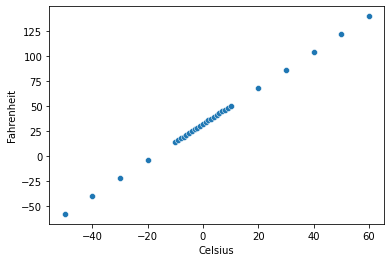

In [ ]:
sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit']);

# Etapa 4: Configuração da base de dados de treinamento

In [ ]:
# Separa o X e o y de treino
X_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

# Etapa 5: Construção e treinamento do modelo

In [ ]:
# Cria um modelo sequencial vazio
model = tf.keras.Sequential()
# Adiciona uma camada densa com um neurônio e entrada de uma dimensão
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
# Mostra um resumo do modelo, incluindo suas camadas e parâmetros
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Configura o modelo para treinamento usando o otimizador Adam com uma taxa de aprendizagem de 0.1 e a função de perda 'mean_squared_error'
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [ ]:
# Treina o modelo usando os dados de entrada X_train e saída y_train, por 500 épocas, e armazena o histórico do treinamento na variável epochs_hist
epochs_hist = model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
1/1 [==============================] - 4s 4s/step - loss: 1794.2631
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 1667.0472
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 1550.3734
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 1444.3840
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 1349.1532
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 1264.6763
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 1190.8507
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 1127.4622
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 1074.1705
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 1030.4958
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 995.8109
Epoch 12/500
1/1 [==============================] - 0s 12ms/step - loss: 969.3397
Epoch 13/500
1/1 [=======

# Etapa 5: Avaliação do modelo

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

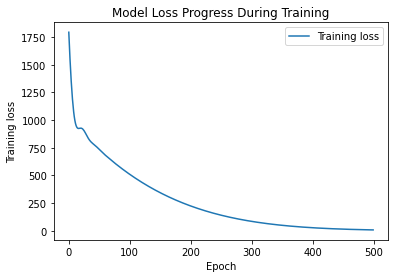

In [ ]:
# Plotando o gráfico para análise
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

In [ ]:
# obter os pesos (weights) do modelo
model.get_weights()

[array([[1.8106937]], dtype=float32), array([29.316582], dtype=float32)]

Ps: apenas observando que 9/5 facionário é 1.8 em decimal

In [ ]:
temp_c = 10
temp_f = model.predict([temp_c])
temp_f

1/1 [==============================] - 0s 81ms/step


array([[47.42352]], dtype=float32)

In [ ]:
temp_f1 = 9/5 * temp_c + 32
temp_f1

50.0